In [75]:
# To open instagram, enter my login details and click on login
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
driver=webdriver.Chrome(executable_path='G:\Web_Driver\chromedriver_win32\chromedriver')
driver.maximize_window()
driver.get('https://www.instagram.com/')
wait=WebDriverWait(driver,20)
time.sleep(2)
Username_bar=wait.until(EC.presence_of_element_located((By.NAME,'username')))
Username_bar.send_keys('SAMPLE USERNAME')
Password_bar=driver.find_element_by_name('password')
Password_bar.send_keys('SAMPLE PASSWORD')
Password_bar.submit()

In [76]:
# To select Not Now option from the Turn On Notifications dialog Box
Not_Now_button=driver.find_element_by_xpath('//button[contains(@class,"aOOlW")]')
Not_Now_button.click()

In [77]:
# To search 'food' in the search bar and To get all the options in the dropdown menu and storing TOP 10 options in list
l=[]
Search_bar=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
Search_bar.send_keys('food')
dropdown=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'Ap253')))
for i in dropdown:
    s=i.get_attribute('innerHTML')
    if s[0]=='#':
        continue
    l.append(s)
l=l[:10]
print(l)


['foodtalkindia', 'foodnetwork', 'foodnetworkkitchen', 'dilsefoodie', 'foodgod', 'foodie_incarnate', 'food', 'foodandwine', 'yourfoodlab', 'thefoodshub']


In [78]:
# To empty the search bar
Search_cancel_button=driver.find_element_by_xpath('//div[contains(@class,"coreSpriteSearchClear")]')
Search_cancel_button.click()

In [79]:
# Opening the first 10 handles to get their number of followers 
from selenium.common.exceptions import NoSuchElementException 
d={}
for i in l:
    try:
        time.sleep(3)
        Search_bar=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
        Search_bar.send_keys(i)
        dropdown=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'Ap253')))
        for option in dropdown:
            if option.text==i:
                option.click()
                break
        time.sleep(3)
        Followers_button=driver.find_element_by_xpath('//a[@class="-nal3 "]/span')
        Followers_in_string=Followers_button.get_attribute('title')
        Followers_in_int=''
        for j in range(len(Followers_in_string)):
            if Followers_in_string[j]!=',':
                Followers_in_int=Followers_in_int+Followers_in_string[j]
        Followers_in_int=int(Followers_in_int)
        d[i]=Followers_in_int
    except NoSuchElementException:
        continue;
    

In [80]:
# Getting the Top 5 handles with Maximum number of followers
import operator
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
c=0
top5=[]
for i in sorted_d:
    if(c==5):
        break
    print(i,' ',sorted_d[i])
    top5.append(i)
    c=c+1

foodnetwork   10325613
foodgod   3597498
foodandwine   3365707
yourfoodlab   1046830
foodnetworkkitchen   409410


In [102]:
# Names of TOP 5 handles with Maximum number of followers
top5

['foodnetwork', 'foodgod', 'foodandwine', 'yourfoodlab', 'foodnetworkkitchen']

In [103]:
# To get the Total number of posts done by TOP 5 handles in the past 3 days
posts={}
for n in top5:
    time.sleep(3)
    Search_bar=wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))
    Search_bar.send_keys(n)
    dropdown=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'Ap253')))
    for option in dropdown:
        if option.text==n:
            option.click()
            break
    time.sleep(3)
    # Scrolling down to load more posts.But at max, there are only 33 posts loaded in the the HTML content of the webpage
    # because when I scroll down, it loads some more elements, but eventually, scrolling down loads more from the bottom 
    # and drops the top ones of the DOM. Hence the total posts at any time of the page can be 33 only.
    current_height=driver.execute_script('return document.body.scrollHeight;')
    for i in range(2):
        driver.execute_script('window.scrollTo(0,arguments[0]);',current_height)
        time.sleep(3)
        new_height=driver.execute_script('return document.body.scrollHeight;')
        current_height=new_height
    time.sleep(3)
    # To scroll up in order to reach to the top of the Page
    current_height=driver.execute_script('return document.body.scrollHeight;')
    driver.execute_script('window.scrollTo(0,arguments[0]);',(-1)*current_height)
    time.sleep(3)
    all_posts=wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[contains(@class,"v1Nh3")]')))
    count=0
    for j in all_posts:
        time.sleep(3)
        j.click()
        time.sleep(2)
        timeframe_button=wait.until(EC.presence_of_element_located((By.XPATH,'//time[contains(@class,"_1o9PC")]')))
        timeframe_text=timeframe_button.text
        character=timeframe_text.split()[1]
        number=int(timeframe_text.split()[0])
        if(character.lower()=='hours' or character.lower()=='hour' or character.lower()=='minutes' or character.lower()=='minute'):
            count=count+1
        elif((character.lower()=='days' or character.lower()=='day') and number<=3):
            count=count+1
        else:
            time.sleep(3)
            close_button=driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]') 
            close_button.click()
            break
        time.sleep(3)
        close_button=driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]') 
        close_button.click()
        
    posts[n]=count

    

foodnetwork 33
foodnetworkkitchen 17
foodandwine 9
yourfoodlab 7
foodgod 2


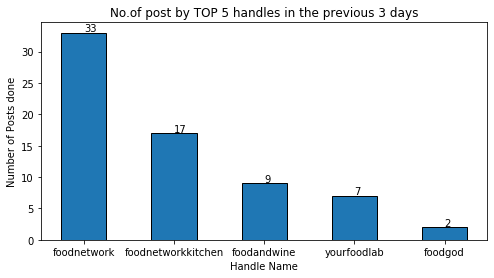

In [104]:
# Displaying the Bar graph showing number of posts done by TOP 5 handles in the previous 3 days
import matplotlib.pyplot as plt
import operator
sorted_p = dict(sorted(posts.items(), key=operator.itemgetter(1),reverse=True))
x=[]
y=[]
for p in sorted_p:
    print(p,sorted_p[p])
    x.append(p)
    y.append(sorted_p[p])
    
plt.rcParams["figure.figsize"] = [8,4]
plt.bar(x,y,edgecolor='black',width=0.5)
plt.title('No.of post by TOP 5 handles in the previous 3 days')
plt.xlabel('Handle Name')
plt.ylabel('Number of Posts done')
for i in range(5):
    plt.text(x[i],y[i]+0.2,y[i])
plt.show()



In [96]:
# To get words and hashtags from the scraped content of TOP 10 posts of the TOP 5 handles along with their frequencies
words={}
hashtags={}
for n in top5:
    Search_bar=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    Search_bar.send_keys(n)
    dropdown=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'Ap253')))
    for option in dropdown:
        if option.text==n:
            option.click()
            break
    time.sleep(3)
    all_posts=wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[contains(@class,"v1Nh3")]')))
    c=0
    for i in all_posts:
        if c==10:
            break
        time.sleep(3)
        i.click()
        scraped_content=wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))
        content=scraped_content.text
        lis=content.split()
        for w in lis:
            if w[0]!='#':
                exact_word=''
                for letter in w:
                    if isinstance(letter, str)==True:
                        exact_word=exact_word+letter
                words[exact_word]=words.get(exact_word,0)+1
            else:
                hashtags[w]=hashtags.get(w,0)+1
        time.sleep(3)
        close_button=driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]') 
        close_button.click()
        c=c+1

In [97]:
# List of words used in all the scraped posts along with their frequency
for w in words:
    print(w,words[w])

# All these words(i.e keys of words dictionary) are strings. you can exceute the commented code to see that they are strings.
#for w in words:
#    print(w,words[w], type(w))
    
    

Class 5
of 58
the 91
Day: 6
Slow 2
Cooker 2
Ranch 2
Chicken 3
Nachos 2
😍 2
@bevcooks 1
is 43
amping 2
up 6
nachos 2
by 18
topping 2
them 7
with 28
slow-cooker 2
ranch 2
chicken 2
and 75
homemade 2
salsa! 2
Take 6
class 10
on 22
@FoodNetworkKitchen 6
app 13
today. 3
It's 3
@wolfiesmom's 1
birthday, 1
that 11
calls 1
for 35
some 6
pistachio 1
gelato 1
🍦💚Happy 1
Birthday, 1
Valerie! 1
. 40
Get 2
recipe 13
app. 4
💥What 1
does 1
it 25
take 2
to 51
actually 3
beat 2
@BobbyFlay?💥 1
According 1
@chefamandaf, 1
"You 1
pretty 1
much 1
have 21
know 8
every 3
cuisine, 1
technique 2
in 44
culinary 1
world, 1
be 11
able 1
do 3
under 1
pressure." 1
SURE, 1
NO 1
PROB! 1
😅😬 1
Catch 1
Amanda 1
judging 1
a 53
marathon, 1
starting 2
@ 1
9:30a|8:30c 2
TODAY! 2
💯 1
Homemade 1
Cavatelli 1
will 3
switch 1
your 20
pasta 1
nights 1
@chefsymon 3
repurposed 1
leftovers 1
make 8
sauce 1
pulled 1
together 6
this 18
LIVE 1
@foodnetworkkitchen's 1
Facebook! 1
If 2
you 39
missed 2
it, 2
catch 1
before 4
another 3
live

In [100]:
# Converting the words dictionary to CSV file
import csv
with open('test.csv', 'w', encoding='utf-8') as f:
    f.write("%s,%s\n"%('Word','Frequency'))
    for key in words.keys():
        f.write("%s,%s\n"%(key,words[key]))

#FoodNetworkKitchen 9
#staysafe 8
#foodie 8
#stayhome 7
#recipe 7


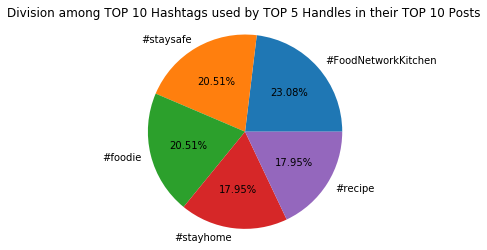

In [101]:
# Displaying Pie Chart showing Division among TOP 10 Hashtags used by TOP 5 Handles in their TOP 10 Posts
import operator
import matplotlib.pyplot as plt
sorted_h = dict(sorted(hashtags.items(), key=operator.itemgetter(1),reverse=True))
x=[]
y=[]
c=0
for h in sorted_h:
    if c==5:
        break
    print(h,sorted_h[h])
    x.append(h)
    y.append(sorted_h[h])
    c=c+1

plt.pie(y,labels=x,autopct='%.2f%%')
plt.axis('equal')
plt.title('Division among TOP 10 Hashtags used by TOP 5 Handles in their TOP 10 Posts')
plt.show()

In [58]:
# To get total likes of TOP 10 posts and followers of TOP 5 handles
from selenium.common.exceptions import NoSuchElementException
likes={}
followers={}
for n in top5:
    search_bar=wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))
    search_bar.send_keys(n)
    dropdown=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'Ap253')))
    for option in dropdown:
        if option.text==n:
            option.click()
            break
    time.sleep(3)
    Followers_button=wait.until(EC.presence_of_element_located((By.XPATH,'//a[@class="-nal3 "]/span')))
    Followers_in_string=Followers_button.get_attribute('title')
    Followers_in_int=''
    for j in range(len(Followers_in_string)):
        if Followers_in_string[j]!=',':
            Followers_in_int=Followers_in_int+Followers_in_string[j]
    Followers_in_int=int(Followers_in_int)
    followers[n]=Followers_in_int
    ALL_posts=wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[contains(@class,"v1Nh3")]')))
    c=0
    for p in ALL_posts:
        if c==10:
            break
        time.sleep(3)
        p.click()
        try:
            time.sleep(3)
            Likes_button=driver.find_element_by_class_name('Nm9Fw')
            Likes_in_string=Likes_button.text.split()[0]
            Likes_in_int=''
            for i in Likes_in_string:
                if i!=',':
                    Likes_in_int=Likes_in_int+i
            Likes_in_int=int(Likes_in_int)
            likes[n]=likes.get(n,0)+Likes_in_int
            
        except NoSuchElementException:
            Views_button=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
            Views_button.click()
            time.sleep(2)
            Likes_button=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr')))
            Likes_in_string=Likes_button.text.split()[0]
            Likes_in_int=''
            for i in Likes_in_string:
                if i!=',':
                    Likes_in_int=Likes_in_int+i
            Likes_in_int=int(Likes_in_int)
            likes[n]=likes.get(n,0)+Likes_in_int
            Background_button=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'QhbhU')))
            Background_button.click()
            
           
        time.sleep(3)
        Close_button=driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]') 
        Close_button.click()      
        c=c+1

In [59]:
# To display the Total likes and calculating the Average Likes for TOP 10 Posts of each Handle and displaying it
print('Total Likes for TOP 10 Posts of each Handle')
for i in likes:
    print(i,likes[i])
    likes[i]=likes[i]/10
print('------------------')
print('Average Likes for TOP 10 Posts of each Handle')
for i in likes:
    print(i,likes[i])


Total Likes for TOP 10 Posts of each Handle
foodnetwork 182699
foodgod 248931
foodandwine 111673
yourfoodlab 216173
foodnetworkkitchen 9422
------------------
Average Likes for TOP 10 Posts of each Handle
foodnetwork 18269.9
foodgod 24893.1
foodandwine 11167.3
yourfoodlab 21617.3
foodnetworkkitchen 942.2


In [60]:
# To display the number of followers of TOP 5 handles
for i in followers:
    print(i,followers[i])
    

foodnetwork 10324513
foodgod 3597469
foodandwine 3365405
yourfoodlab 1046057
foodnetworkkitchen 408871


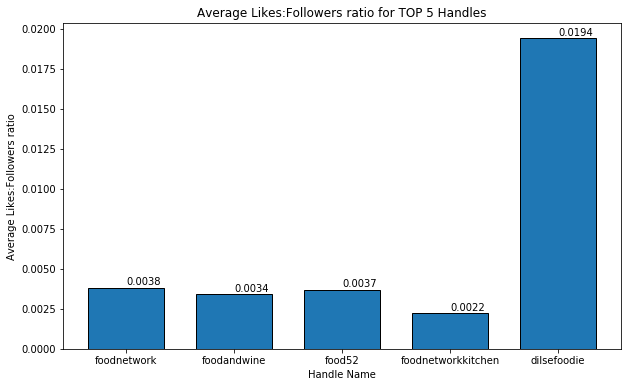

In [47]:
# Displaying the Bar graph showing Average Likes:Followers ratio for TOP 5 Handles
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]
x=[]
y=[]
for i in likes:
    x.append(i)
    y.append(likes[i]/followers[i])
plt.bar(x,y,edgecolor='black',width=0.7)
plt.title('Average Likes:Followers ratio for TOP 5 Handles')
plt.xlabel('Handle Name')
plt.ylabel('Average Likes:Followers ratio')
for i in range(len(x)):
    plt.text(x[i],y[i]+0.00018,'%.4f'%y[i])

plt.show()